In [7]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
pytrend = TrendReq(hl = 'en-US', tz = 360)

In [8]:
_payload = pytrend.build_payload(kw_list=["amazon", "netflix", "facebook", "tesla"], geo = "US")

panda_payload = pytrend.interest_over_time()

In [9]:
tesla_trend = panda_payload["tesla"].tolist() #elonmusk
amazon_trend = panda_payload["amazon"].tolist() 
facebook_trend = panda_payload["facebook"].tolist() 
netflix_trend = panda_payload["netflix"].tolist()

# time_trend = panda_payload["date"].tolist()


In [10]:
time_chunks = (list)(range(len(panda_payload)))
# print(time_chunks)

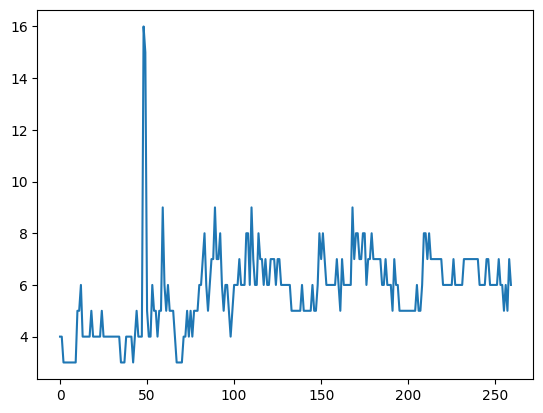

In [11]:
plt.plot(time_chunks, tesla_trend) # test ca sa vad cum returneaza api-ul asta valorile

<Axes: xlabel='date'>

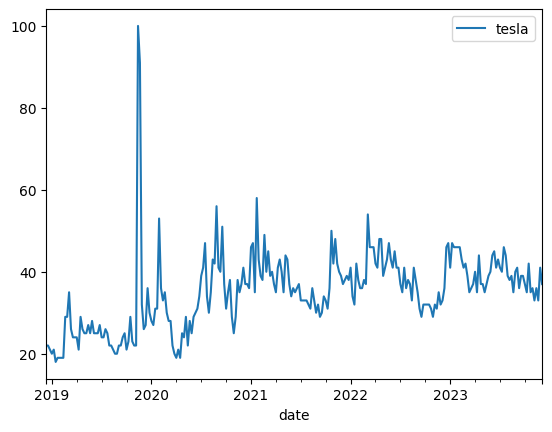

In [12]:
pytrend.build_payload(kw_list=["tesla"], geo = "US")
panda_payload_new = pytrend.interest_over_time()
tesla_trend_new = panda_payload_new["tesla"].tolist() #elonmusk
panda_payload_new.plot()
# df = panda_payload_new.head()
# print(df)
# plt.plot(time_chunks, tesla_trend_new)

Acum incercam sa observam o corelatie basic intre trend si pret (fara niciun sentiment analysis, sa vedem plain o diferenta ori pozitiva ori negativa)

In [17]:
import yfinance as yf

In [18]:
def see_correlation(symbol: str, name : str) :
    global pytrend
    pytrend.build_payload(kw_list=[name], geo = "US")
    _payload_new = pytrend.interest_over_time()
    _trend_new = _payload_new[name].tolist() #elonmusk
    _payload_new.plot()
    _time = _payload_new.index
    _price = yf.Ticker(symbol)
    
    _price_history = _price.history(start=_time.tolist()[0],end=_time.tolist()[-1])
    _open_price_history = _price_history["Open"]
    print(_open_price_history)
    plt.figure()
    _open_price_history.plot()

Date
2018-12-17 00:00:00-05:00     78.300003
2018-12-18 00:00:00-05:00     77.000000
2018-12-19 00:00:00-05:00     77.152496
2018-12-20 00:00:00-05:00     74.199997
2018-12-21 00:00:00-05:00     73.249496
                                ...    
2023-11-27 00:00:00-05:00    147.529999
2023-11-28 00:00:00-05:00    146.979996
2023-11-29 00:00:00-05:00    147.850006
2023-11-30 00:00:00-05:00    144.759995
2023-12-01 00:00:00-05:00    146.000000
Name: Open, Length: 1249, dtype: float64


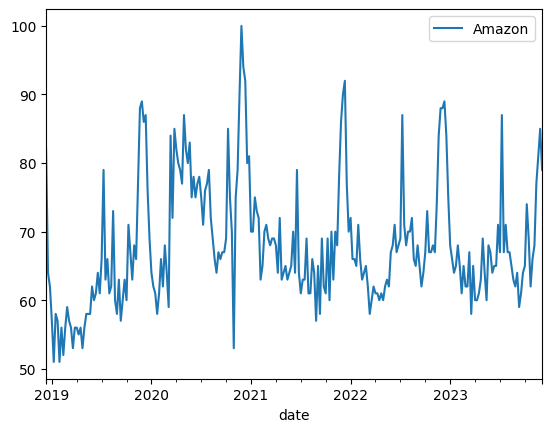

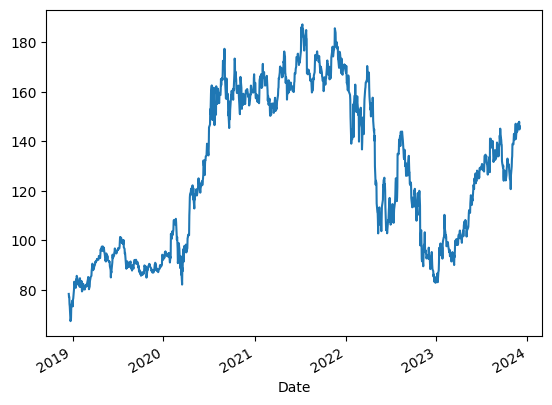

In [15]:
see_correlation("AMZN", "Amazon")

Date
2018-12-17 00:00:00-05:00    266.510010
2018-12-18 00:00:00-05:00    263.299988
2018-12-19 00:00:00-05:00    269.959991
2018-12-20 00:00:00-05:00    264.640015
2018-12-21 00:00:00-05:00    263.829987
                                ...    
2023-11-27 00:00:00-05:00    479.029999
2023-11-28 00:00:00-05:00    478.109985
2023-11-29 00:00:00-05:00    479.000000
2023-11-30 00:00:00-05:00    475.309998
2023-12-01 00:00:00-05:00    473.170013
Name: Open, Length: 1249, dtype: float64


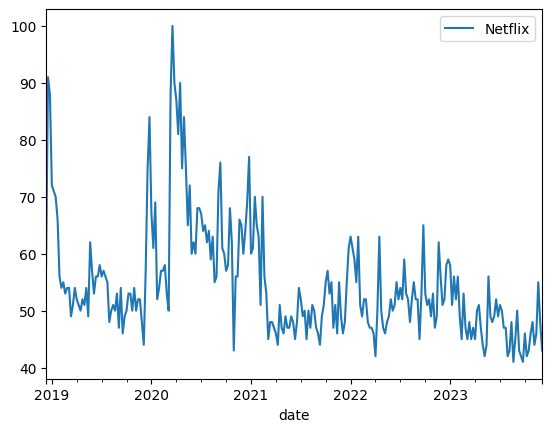

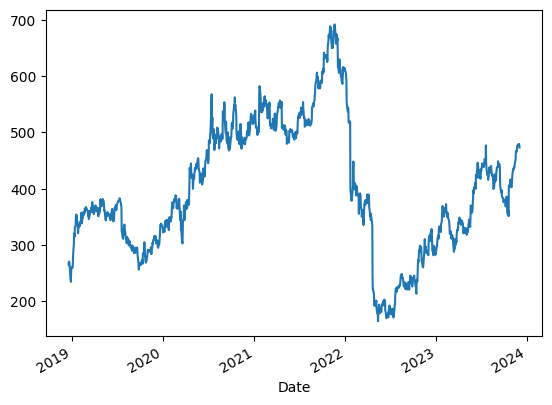

In [19]:
see_correlation("NFLX", "Netflix")